In [1]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


Load and Preprocess the Dataset (A) MNIST - Handwritten Digits

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.50MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



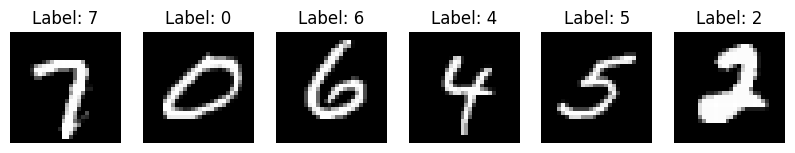

In [3]:
# Define a transformation for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

# Download and load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create a DataLoader for batching
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Visualize some images
def show_images(images, labels):
    fig, axes = plt.subplots(1, 6, figsize=(10, 2))
    for i in range(6):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show sample images
show_images(images, labels)


(B) CIFAR-10 - Natural Images

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


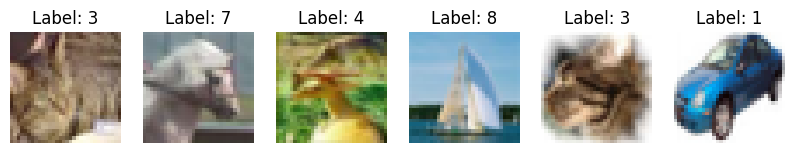

In [4]:
# Define a transformation for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

# Download and load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Create a DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Show some images
def show_images(images, labels):
    fig, axes = plt.subplots(1, 6, figsize=(10, 2))
    for i in range(6):
        img = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        img = (img * 0.5) + 0.5  # Denormalize
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show sample images
show_images(images, labels)


(C) CelebA - Faces Dataset

Streaming output truncated to the last 5000 lines.
  inflating: celeba/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197617.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197618.jpg  
  inflating

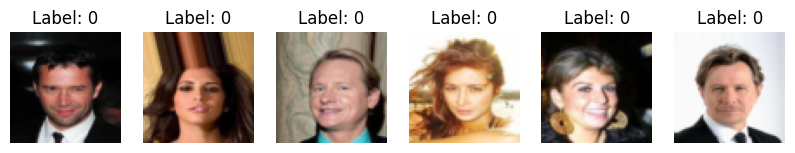

In [5]:
# Install Kaggle API (if dataset is not manually uploaded)
!pip install kaggle

# Upload your Kaggle API key
from google.colab import files
files.upload()  # Upload 'kaggle.json'

# Set up Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download CelebA dataset
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.zip -d celeba

# Define transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CelebA dataset
celeba_dataset = torchvision.datasets.ImageFolder(root='celeba/img_align_celeba', transform=transform)
celeba_loader = torch.utils.data.DataLoader(celeba_dataset, batch_size=64, shuffle=True)

# Show some images
data_iter = iter(celeba_loader)
images, labels = next(data_iter)

show_images(images, labels)


Load and Preprocess CIFAR-10

Files already downloaded and verified


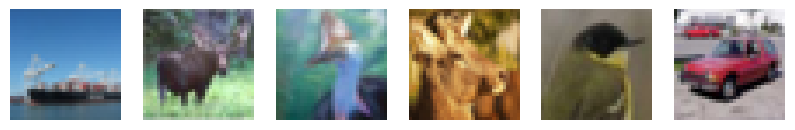

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Function to visualize images
def show_images(images, num=6):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    for i in range(num):
        img = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        img = img * 0.5 + 0.5  # Denormalize from [-1,1] to [0,1]
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, _ = next(data_iter)

# Show original images
show_images(images)


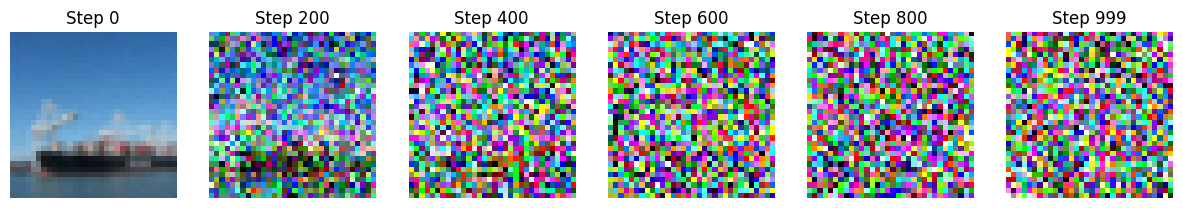

In [7]:
import numpy as np

# Define number of diffusion steps
T = 1000  # More steps = smoother transition
betas = torch.linspace(0.0001, 0.02, T)  # Small to large noise
alphas = 1 - betas
alpha_cumprod = torch.cumprod(alphas, dim=0)  # Cumulative product of alphas

# Function to add noise
def forward_diffusion(image, t):
    noise = torch.randn_like(image)  # Generate Gaussian noise
    alpha_t = alpha_cumprod[t].view(-1, 1, 1, 1)  # Get corresponding alpha value
    noisy_image = torch.sqrt(alpha_t) * image + torch.sqrt(1 - alpha_t) * noise
    return noisy_image

# Visualize images at different noise levels
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, t in enumerate([0, 200, 400, 600, 800, 999]):
    noisy_img = forward_diffusion(images[0:1], t)
    img = noisy_img[0].permute(1, 2, 0).detach().numpy()
    img = img * 0.5 + 0.5  # Denormalize
    axes[i].imshow(img)
    axes[i].set_title(f"Step {t}")
    axes[i].axis('off')

plt.show()


Implementing the U-Net Model

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the U-Net model
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, features=[64, 128, 256, 512]):
        super(UNet, self).__init__()

        self.encoders = nn.ModuleList()
        self.pools = nn.ModuleList()
        self.skip_connections = []

        # Encoding Path
        for feature in features:
            self.encoders.append(self.conv_block(in_channels, feature))
            self.pools.append(nn.MaxPool2d(kernel_size=2, stride=2))
            in_channels = feature

        # Bottleneck Layer (Ensure correct output channels)
        self.bottleneck = self.conv_block(features[-1], features[-1])  # Keep channels same

        # Decoding Path
        self.decoders = nn.ModuleList()
        self.upconvs = nn.ModuleList()
        for feature in reversed(features[:-1]):  # Skip the last one since it's bottleneck
            self.upconvs.append(nn.ConvTranspose2d(features[-1], feature, kernel_size=2, stride=2))
            self.decoders.append(self.conv_block(features[-1], feature))
            features[-1] = feature  # Update the last feature count

        # Final output layer
        self.final_layer = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        """Creates a convolutional block"""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        skip_connections = []

        # Encoder path
        for enc, pool in zip(self.encoders, self.pools):
            x = enc(x)
            skip_connections.append(x)
            x = pool(x)

        # Bottleneck
        x = self.bottleneck(x)

        # Decoder path
        for i, (upconv, dec) in enumerate(zip(self.upconvs, self.decoders)):
            x = upconv(x)
            skip_connection = skip_connections[-(i + 1)]

            # Ensure correct shape before concatenation
            if x.shape[1] != skip_connection.shape[1]:
                x = nn.Conv2d(x.shape[1], skip_connection.shape[1], kernel_size=1).to(x.device)(x)

            x = torch.cat((x, skip_connection), dim=1)  # Concatenation
            x = dec(x)  # Apply decoder convolution

        return self.final_layer(x)  # Reduce to 3 channels (RGB)

# Initialize the model
unet = UNet()
print("✅ U-Net Model Fixed and Ready!")


✅ U-Net Model Fixed and Ready!


Training the U-Net for Denoising 1️⃣ Define the Loss Function & Optimizer

In [9]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet.to(device)

# Loss function (MSE for image reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam for fast convergence)
optimizer = optim.Adam(unet.parameters(), lr=0.001)


2️⃣ Training Loop